# Introduction
Author: Noah McCord
The intended purpose of this notebook is to give an example walkthrough of the data science life cycle, with specific applications to a topic.

In this case, we will be looking into the biggest contributors to "Happiness" on a country-wide scale. The dataset used for this can be found on [Kaggle](https://www.kaggle.com/unsdsn/world-happiness#2017.csv). The primary aspects of note for the report are the reported happiness of the citizens from within the country, with other variables about the country such as the GDP per person, the country's value of family, generosity (willingness to give to charity), trust in their government, overall health standards, and the levels of freedom for those living in the country. In addition to these pieces of information, the data set also constructs a hypothetical worst country called Dystopia, to which all other countries are compared in the form of the dystopia residual.

More generic information for the World Happiness Report can be found [here](https://worldhappiness.report).

# Motivation
There are plenty of different topics available to us, and plenty of data to analyze, so why this? 
The rationale behind analyzing these trends stems from the current political climate, where we are seeing very polarized opinions on how society should be set up. The problem there is that due to the incredibly polarized views of people involved, it can be hard to make any real progress if we are just using morality and "ought-to"s as our basis for debate. 

This is where data science can be useful. Although data can be manipulated and twisted to serve particular interests, when used well, it can be a less subjective way to approach these controversial topics. By removing the emotion and instead looking at the data to draw conclusions from, we are able to contribute something substantial to this difficult conversation.

# Data Collection
After we have decided on which data set we want to use (as detailed above), the first step towards analysis is to convert our data from the file format (in this case a CSV) to something useable by our code. For this example, we will be using the Pandas library for data storage, due to its robust library offering us many tools for data manipulation as needed.

To scrape our data from the CSV, we will use the following code.

In [1]:
import pandas as pd
#Using the pandas library

data15 = pd.read_csv("world-happiness-report/2015.csv")
#Reading in the data from the file and storing it in a dataframe

data15.head(10)
#Printing out the first 10 lines of our CSV

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
5,Finland,Western Europe,6,7.406,0.03140,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955
6,Netherlands,Western Europe,7,7.378,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570
7,Sweden,Western Europe,8,7.364,0.03157,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119
8,New Zealand,Australia and New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
9,Australia,Australia and New Zealand,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646


More information about CSVs and readers can be found [here](https://realpython.com/python-csv/). A key note for people learning is that it is inadvisable to create your own reader, as there are many more established and safe options already available to you, such as the Pandas library of python as used above. Other libraries such as "csv" also offer options, but since we will be working with the data as a dataframe, it is easier to let the Pandas library read in the data as the Pandas method stores the data directly into a dataframe.

In [2]:
#Reading in the files for the 2016 and 2017 reports as well.

data16 = pd.read_csv("world-happiness-report/2016.csv")
data17 = pd.read_csv("world-happiness-report/2017.csv")

One small issue with our data thus far is that, as with most programming languages, the dataframe has indexes starting from 0. While this will be acceptable, for better readibility we would prefer our indexes corresponded to their associated happiness ranking. To do this, we shift all indexes by 1.

In [3]:
#Accessing index property of our dataframes and shifting them
data15.index += 1
data16.index += 1
data17.index += 1

As you have likely noticed thus far, we are working with 3 different world happiness reports at the same time. This allows us to not only see the relationships between different columns and overall happiness, but also allows us to see trends over years about which countries seem to be happier, and what traits in particular seem to lead to that happiness.

Now, let's look at our other datasets.

In [4]:
data16.head()

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
1,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
2,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
3,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
4,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
5,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


In [5]:
data17.head()

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
1,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
2,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
3,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
4,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
5,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


It seems there are some differences in these datasets. For instance, the 2017 dataset drops the region of the world where the country is located. This is actually a datapoint we may be interested in keeping. At least in the top 5 from 2016, all 5 countries are located in Western Europe. So perhaps geographic location has something to do with the overall happiness? We cannot be sure until we investigate further, but as such we need to include this data.

So how do we add region into the dataframe? Well, the countries don't move at all, so we can use our 2015 and 2016 datasets with region and add this data into the 2017 dataset.

In [6]:
def func():
    #Creating a dictionary to store country and region
    dict = {}

    #Iterating through the 2016 dataset and setting the dictionary
    #to be a key-value pair of country-region
    for i in range(0, len(data16.index)):
        country = data16.iloc[i]['Country']
        region = data16.iloc[i]['Region']
        dict[country] = region

    #Setting the 2017 dataset to have the same region
    for i in range(0, len(data17.index)):
        country = data17.iloc[i]['Country']
        #Here we use the at method instead of just assigning
        #because assigning to an object you are iterating through
        #can cause some bad output.
        
        #At also takes in the row index (which in our case is equal to the happiness score
        #versus iloc which just takes in the general row, hence needing to add 1 in.
        data17.at[i + 1, 'Region'] = dict[country]

To migrate our data over, we can use our above function. It will pull from the 2016 database and move it to the 2017 database. Nice and easy right? What if we ran this code?

![title](figs/error.PNG)

Oh no! Here we have a common issue with data science. We do not always have gaurentees that our databases will match up as nicely and neatly as one may want. This problem grows to be even more of a headache when working across databases of different types. How do we know that things that are the same will be refered to by the same name? This gets into the problem of "entity resolution", wherein we have to connect these data entries that refer to the same country!

If we revist our dataset, we can find that in 2016, the country was refered to as simply Taiwan, but in 2017 it becomes "Taiwan Province of China". In order to solve this, there are a number of approaches, ranging from simply hard-coding in a changed country name, to truncating or evaluating the name of the country via language processing. For the purposes of this project, the former is a much simpler option, and will be used here. 

In [7]:
def func():
    #Same code as above with minor tweaks
    dict = {}
    #Variable to catch any countries not in old database
    # with the same name
    invalid = []

    for i in range(0, len(data16.index)):
        country = data16.iloc[i]['Country']
        region = data16.iloc[i]['Region']
        dict[country] = region

    for i in range(0, len(data17.index)):
        country = data17.iloc[i]['Country']
        
        #Checking if the country is in our list of keys (countries from 2016)
        if country in dict.keys():
            data17.at[i + 1, 'Region'] = dict[country]
        else:
            #If it is not in our list, we consider it invalid
            invalid.append(country)

    return invalid

invalid_countries = func()
invalid_countries

['Taiwan Province of China',
 'Hong Kong S.A.R., China',
 'Mozambique',
 'Lesotho',
 'Central African Republic']

So now, most of our data is converted, and we know which countries we will need to manually add in.   
  
'Taiwan Province of China' corresponds to 'Taiwan', a country in Eastern Asia as included in the 2016 survey.  
'Hong Kong S.A.R., China' corresponds to 'Hong Kong', a country in Eastern Asia as included in the 2016 survey.  
'Mozambique' is a country in Sub-Saharan Africa, as included in the 2015 survey.  
'Lesotho' is a country in Sub-Saharan Africa, as included in the 2015 survey.  
'Central African Republic' is a country in Sub-Saharan Africa, as included in the 2015 survey.
  
We have two countries that were renamed, and two countries that were not included in the 2016 survey. We may find there other issues with the dataset as we work with it more deeply, but as of this time, what we have done is sufficient.  
  
This is part of the data science life cycle. The cycle is not a linear one, and can involve revisiting the steps we previously thought done once we find issues such as these. We constantly review our dataset and ensure it is up to our standards, as well as evaluating whether we are asking the right questions for data analysis. 

In [8]:
#Setting Taiwain Province of China
data17.at[33, 'Region'] = 'Eastern Asia.' 

#Setting Hong Kong S.A.R, China
data17.at[71, 'Region'] = 'Eastern Asia.' 

#Setting Mozambique
data17.at[113, 'Region'] = 'Sub-Saharan Africa'

#Setting Lesotho
data17.at[139, 'Region'] = 'Sub-Saharan Africa'

#Setting Central African Republic
data17.at[155, 'Region'] = 'Sub-Saharan Africa' 

Now that we have added the region, let's take a look at our data.

In [9]:
data17.head(5)

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual,Region
1,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,Western Europe
2,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,Western Europe
3,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,Western Europe
4,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,Western Europe
5,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,Western Europe


We still have one last issue. The column names have changed slightly from 2016 to 2017. It would be easier to work with the data with the columns name as a constant across years, so we can rename them using the pandas [rename method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rename.html).

In [10]:
data17 = data17.rename(index = str, columns={"Happiness.Rank": "Happiness Rank", "Happiness.Score": "Happiness Score",\
                                    "Economy..GDP.per.Capita.":"Economy (GDP per Capita)",\
                                    "Health..Life.Expectancy.":"Health (Life Expectancy)",\
                                    "Trust..Government.Corruption.":"Trust (Government Corruption)",\
                                    "Dystopia.Residual":"Dystopia Residual"})

We are almost done with data tidying. We have some missing countries in our data set (for instance Cuba is missing from the 2017 table). We have a couple of options available to us when we have missing data. We can 
  
A) Leave it off the table altogether  
B) Add it in with a row of "NaN" (Not-a-Number) entries to signify no data collected  
  
For our purposes, it is okay to have missing countries, as we are just trying to collect general trends about contributors to happiness, so we will just leave it out.
The final change we will make to our dataset is to drop the whisker high and low columns for all datasets, as we will not be using these columns for our analysis. Information on the drop method can be found [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html).

In [11]:
data15 = data15.drop(['Standard Error'], axis=1)
data16 = data16.drop(['Lower Confidence Interval', 'Upper Confidence Interval'], axis=1)
data17 = data17.drop(['Whisker.high', 'Whisker.low'], axis=1)

Now that we have tidied up our data just a little, we can begin delving a little deeper into actual analysis. 

# Data Analysis
A big part of analyzing data deals with finding trends in data and ultimatley conducting hypothesis tests. The first step in this process is to decide some aspect of our data set to analyze. 

For happiness trends, I am interested in looking at the columns of the dataset, but especially so in GDP per capita and its affect on happiness. As such, I am going to create a plot of GDP per Capita compared to the happiness rank of each country, in hopes of finding some sort of relationship between the two variables.

To help do this, we use the python package "matplotlib" to create plots.

<Figure size 1080x1440 with 0 Axes>

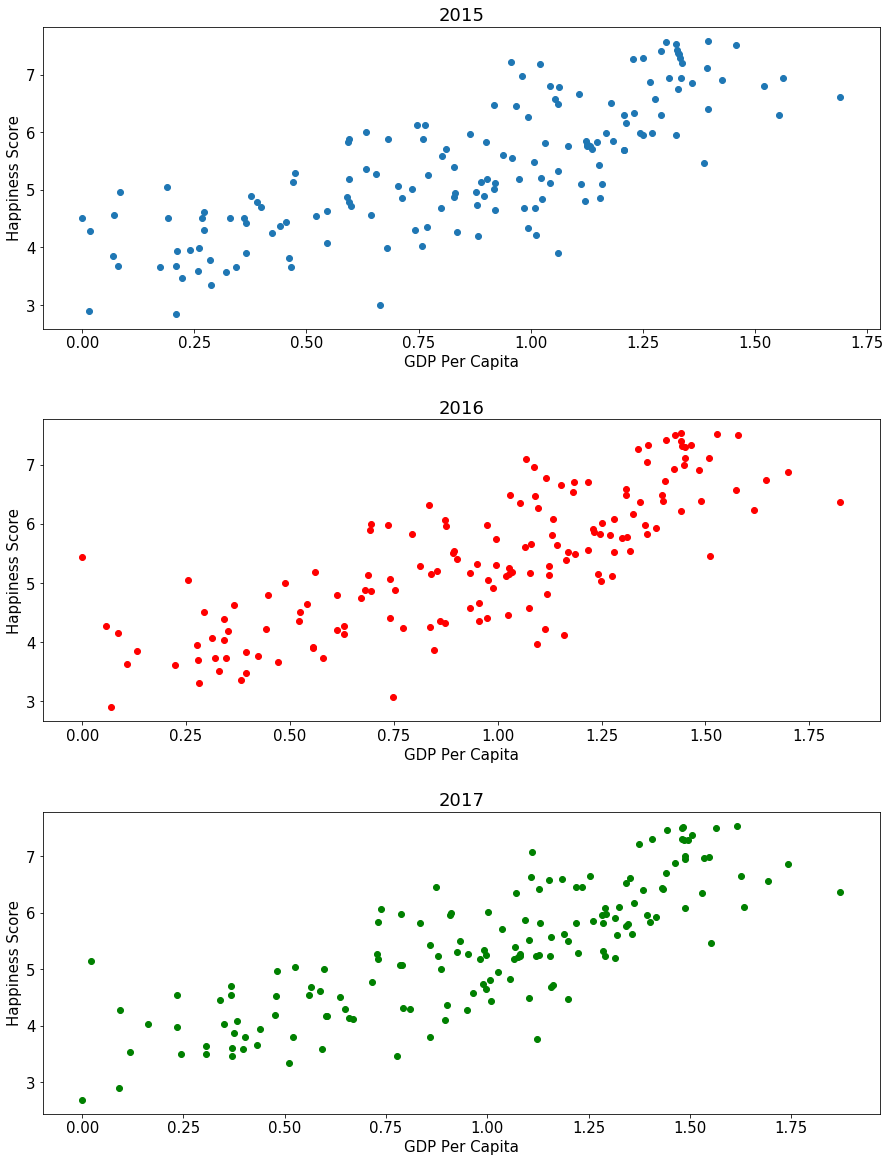

In [12]:
%matplotlib inline
#Command to make our plots show up on the first run

import matplotlib.pyplot as plt
#Importing required library

#Setting formatting to be more readable
plt.rcParams["figure.figsize"] = (15, 20)
plt.rcParams.update({'font.size': 15})

#Creating a new figure with 3 subplots
plt.figure()
fig1, graphs1 = plt.subplots(3, 1)

#Setting the axis of each graph to our variable names
graphs1[0].set_title('2015')
graphs1[0].set_xlabel('GDP Per Capita')
graphs1[0].set_ylabel('Happiness Score')
graphs1[1].set_title('2016')
graphs1[1].set_xlabel('GDP Per Capita')
graphs1[1].set_ylabel('Happiness Score')
graphs1[2].set_title('2017')
graphs1[2].set_xlabel('GDP Per Capita')
graphs1[2].set_ylabel('Happiness Score')

#Plotting our data points, using the exact name of the column
#to retrieve all the data from it and plot those columns
graphs1[0].scatter(data15['Economy (GDP per Capita)'], data15['Happiness Score'])
graphs1[1].scatter(data16['Economy (GDP per Capita)'], data16['Happiness Score'], color = 'r')
graphs1[2].scatter(data17['Economy (GDP per Capita)'], data17['Happiness Score'], color = 'g')


#Increasing the amount of vertical space between the subplots for readibility
plt.subplots_adjust(hspace=.3)

So now we have some plots to accompany our data. From these plots, it certainly seems like there is some linear relationship between GDP Per Capita and Happiness Score, but we do not have enough information from this alone to draw any major conclusions. 

In order to give us more information, we can perform linear regression on the three graphs and come up with a line of best fit for each. To do this, we can utilize the scipy "stats" library. Information about the linear regression method can be found [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html).

<Figure size 1080x1440 with 0 Axes>

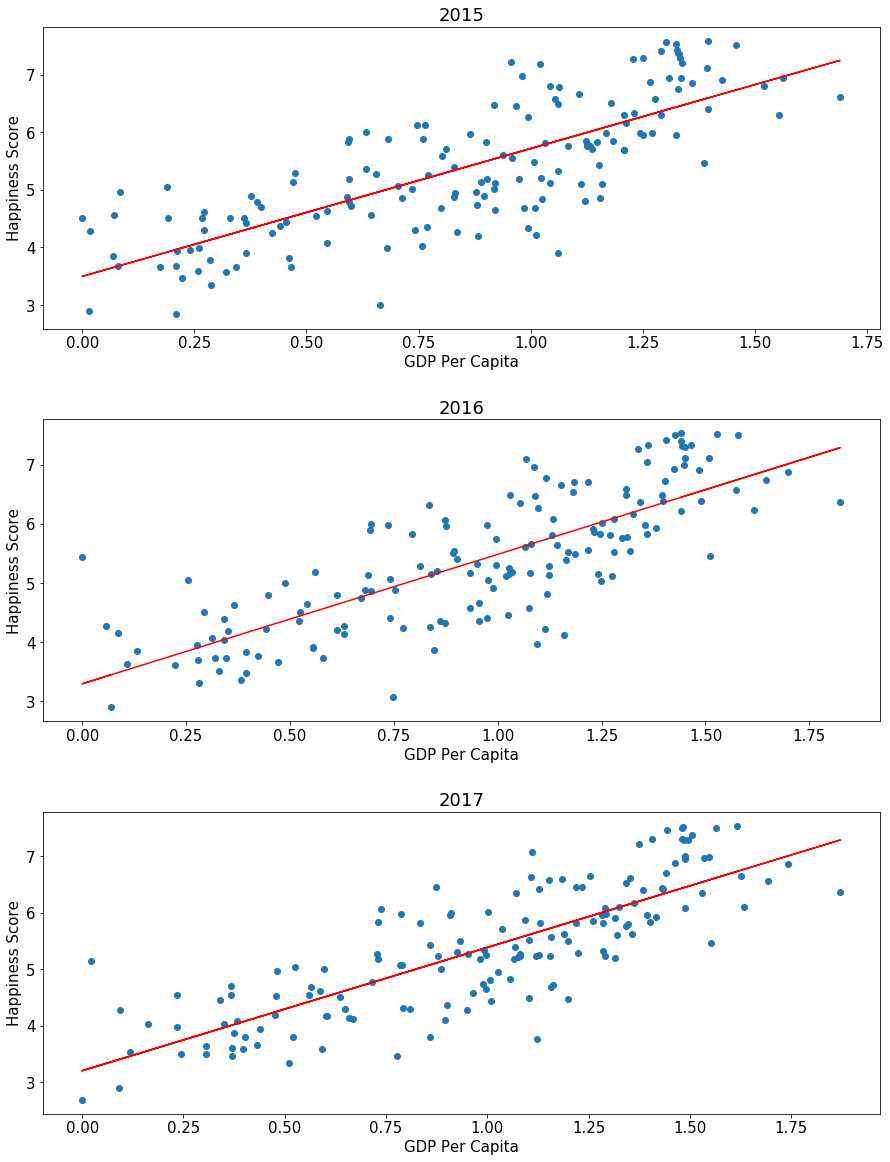

In [13]:
from scipy import stats

#Same code from above with a new figure
plt.rcParams["figure.figsize"] = (15, 20)
plt.rcParams.update({'font.size': 15})

plt.figure()
fig2, graphs2 = plt.subplots(3, 1)

graphs2[0].set_title('2015')
graphs2[0].set_xlabel('GDP Per Capita')
graphs2[0].set_ylabel('Happiness Score')
graphs2[1].set_title('2016')
graphs2[1].set_xlabel('GDP Per Capita')
graphs2[1].set_ylabel('Happiness Score')
graphs2[2].set_title('2017')
graphs2[2].set_xlabel('GDP Per Capita')
graphs2[2].set_ylabel('Happiness Score')

graphs2[0].scatter(data15['Economy (GDP per Capita)'], data15['Happiness Score'])
graphs2[1].scatter(data16['Economy (GDP per Capita)'], data16['Happiness Score'])
graphs2[2].scatter(data17['Economy (GDP per Capita)'], data17['Happiness Score'])

plt.subplots_adjust(hspace=.3)

#Start of linear regression

#Uses 'stats' to run linear regression on data and store associated values
slope15, intercept15, r_value15, p_value15, std_err15 = \
    stats.linregress(data15['Economy (GDP per Capita)'], data15['Happiness Score'])
slope16, intercept16, r_value16, p_value16, std_err16 = \
    stats.linregress(data16['Economy (GDP per Capita)'], data16['Happiness Score'])
slope17, intercept17, r_value17, p_value17, std_err17 = \
    stats.linregress(data17['Economy (GDP per Capita)'], data17['Happiness Score'])

graphs2[0].plot(data15['Economy (GDP per Capita)'], intercept15 + slope15 * \
                data15['Economy (GDP per Capita)'], 'r')
graphs2[1].plot(data16['Economy (GDP per Capita)'], intercept16 + slope16 * \
                data16['Economy (GDP per Capita)'], 'r')
graphs2[2].plot(data17['Economy (GDP per Capita)'], intercept17 + slope17 * \
                data17['Economy (GDP per Capita)'], 'r')

In [14]:
print("2015 p_value: " + str(p_value15))
print("2016 p_value: " + str(p_value16))
print("2017 p_value: " + str(p_value17))

2015 p_value: 1.0505384131960194e-33
2016 p_value: 8.494371735007238e-35
2017 p_value: 1.1103905896577026e-37


For each of our years, we have very small p values, indicating that, if there was no relationship between GDP Per Capita and Happiness Score, we would be very unlikely to obtain such a result, much less so for each year. As such, we can conclude that their may be some relationship between the two.

But we have additional information available to us, such as the r values, which give us an indication of the strength of a linear relationship between the two variables.

In [15]:
print("2015 r_value: " + str(r_value15))
print("2016 r_value: " + str(r_value16))
print("2017 r_value: " + str(r_value17))

2015 r_value: 0.780965526866021
2016 r_value: 0.7903220167261061
2017 r_value: 0.8124687538866411


There seems to be a moderately strong linear relationship between these two variables. For now, let's save the average of the r values over the 3 years so we can compare to the other variables after we analyze them.

In [16]:
import statistics
#Import statistics model for its methods

overall = {}
#Take the mean of our data
overall['GDP'] = statistics.mean([r_value15, r_value16, r_value17])
overall

{'GDP': 0.7945854324929228}

In [17]:
def plot_lin(name):
    '''Function for plotting points and creating a line of best fit
    Returns a dictionary with key-value of year and p-value'''
    
    #Same code from above yet again, but this time generalized for any variable name
    plt.rcParams["figure.figsize"] = (10, 5)
    plt.rcParams.update({'font.size': 15})

    plt.figure()
    fig3, graphs3 = plt.subplots(1, 1)
    
    graphs3.set_title('2017')
    graphs3.set_xlabel(name)
    graphs3.set_ylabel('Happiness Score')

    graphs3.scatter(data17[name], data17['Happiness Score'])

    slope15, intercept15, r_value15, p_value15, std_err15 = \
        stats.linregress(data15[name], data15['Happiness Score'])
    slope16, intercept16, r_value16, p_value16, std_err16 = \
        stats.linregress(data16[name], data16['Happiness Score'])
    slope17, intercept17, r_value17, p_value17, std_err17 = \
        stats.linregress(data17[name], data17['Happiness Score'])

        
    #To limit unecessary output, this function will only plot the 2017 data, but will still calculate
    #the line of best fit for all years.
    graphs3.plot(data17[name], intercept17 + slope17 * \
                    data17[name], 'r')
    
    total_values = {}
    
    p_values = {}
    p_values[2015] = p_value15
    p_values[2016] = p_value16
    p_values[2017] = p_value17
    total_values['p_values'] = p_values
    
    r_values = {}
    r_values[2015] = r_value15
    r_values[2016] = r_value16
    r_values[2017] = r_value17
    total_values['r_values'] = r_values
    
    return total_values

<Figure size 720x360 with 0 Axes>

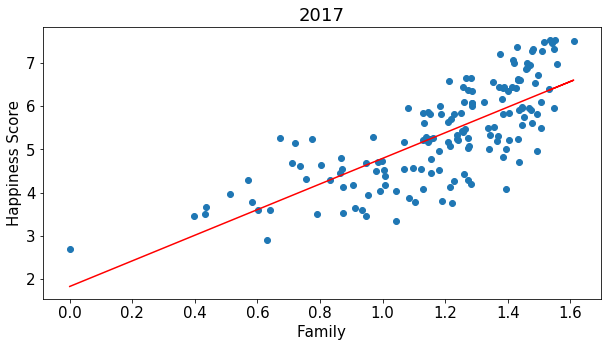

In [18]:
#Calling function and saving results to res for manipulation
res = plot_lin('Family')

In [19]:
print("P_values: " + str(res['p_values']) + "\n")
#Checking for small p-values to ensure a relationship between the two variables
print("R_values: " + str(res['r_values']))
#Printing our r-values to see how strong the relationship is

#Adding in our r_values, which are currently stored as a hash, so we take the mean of the values
overall['Family'] = statistics.mean(res['r_values'].values())
overall

P_values: {2015: 9.918850000100603e-29, 2016: 2.090655666051565e-28, 2017: 1.4163391139613932e-29}

R_values: {2015: 0.7406051972367846, 2016: 0.7392515774070019, 2017: 0.7527366726961482}


{'GDP': 0.7945854324929228, 'Family': 0.7441978157799782}

We now have a framework from which to analyze and compare our data. Now let's test the other variables and see how it all stacks up.

<Figure size 720x360 with 0 Axes>

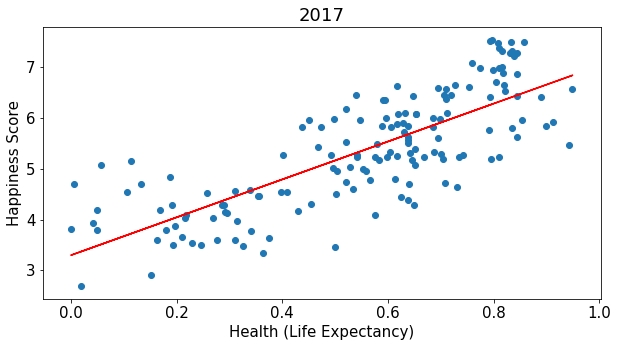

In [20]:
res = plot_lin('Health (Life Expectancy)')

In [21]:
print("P_values: " + str(res['p_values']) + "\n")
print("R_values: " + str(res['r_values']))

overall['Health'] = statistics.mean(res['r_values'].values())

P_values: {2015: 5.788895505901188e-27, 2016: 1.7904861785854044e-31, 2017: 3.2129704689696394e-33}

R_values: {2015: 0.7241995951050696, 2016: 0.765384334433668, 2017: 0.7819506247990082}


<Figure size 720x360 with 0 Axes>

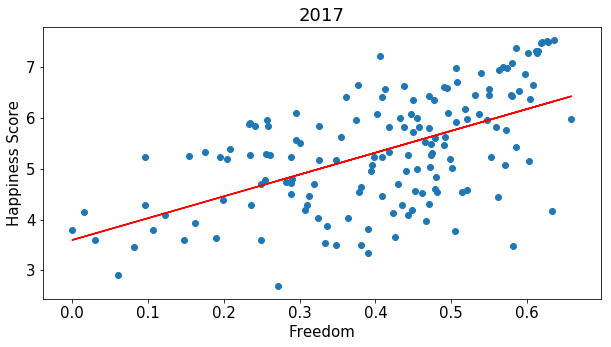

In [22]:
res = plot_lin('Freedom')

In [23]:
print("P_values: " + str(res['p_values']) + "\n")
print("R_values: " + str(res['r_values']))

overall['Freedom'] = statistics.mean(res['r_values'].values())

P_values: {2015: 6.875808160846665e-15, 2016: 1.0054686835656556e-14, 2017: 9.687898897859464e-15}

R_values: {2015: 0.5682109041925181, 2016: 0.5668266730968933, 2017: 0.5701371935975071}


<Figure size 720x360 with 0 Axes>

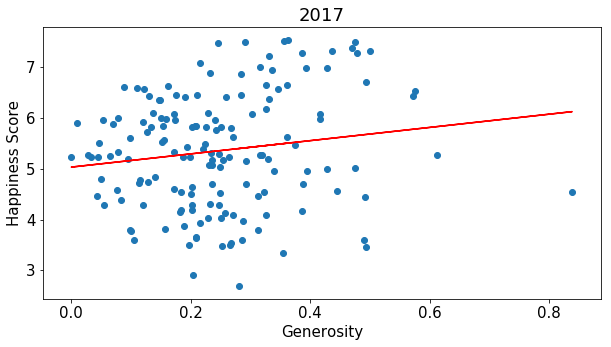

In [24]:
res = plot_lin('Generosity')

In [25]:
print("P_values: " + str(res['p_values']) + "\n")
print("R_values: " + str(res['r_values']))

overall['Generosity'] = statistics.mean(res['r_values'].values())

P_values: {2015: 0.023378715912797124, 2016: 0.04979136943452999, 2017: 0.05373250407926211}

R_values: {2015: 0.1803185266971743, 2016: 0.15684779640360802, 2017: 0.1552558391127446}


We have somewhat weak p_values here, so we should be wary of generosity moving foward. 

<Figure size 720x360 with 0 Axes>

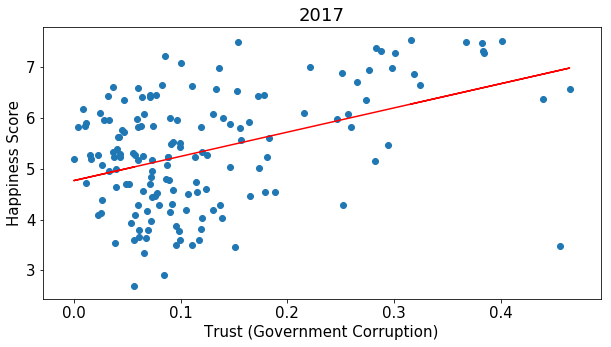

In [26]:
res = plot_lin('Trust (Government Corruption)')

In [27]:
print("P_values: " + str(res['p_values']) + "\n")
print("R_values: " + str(res['r_values']))

overall['Trust'] = statistics.mean(res['r_values'].values())

P_values: {2015: 2.763802425204232e-07, 2016: 1.7978426584022855e-07, 2017: 2.5383106997415988e-08}

R_values: {2015: 0.3951985838369108, 2016: 0.40203224514729247, 2017: 0.4290797372221718}


In [28]:
overall

{'GDP': 0.7945854324929228,
 'Family': 0.7441978157799782,
 'Health': 0.7571781847792486,
 'Freedom': 0.5683915902956395,
 'Generosity': 0.1641407207378423,
 'Trust': 0.40877018873545834}

<Figure size 720x360 with 0 Axes>

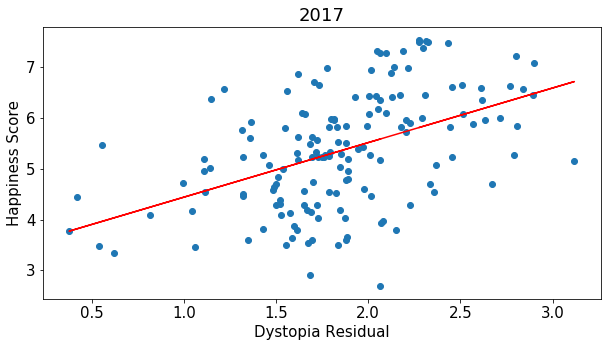

In [29]:
res = plot_lin('Dystopia Residual')

In [30]:
print("P_values: " + str(res['p_values']) + "\n")
print("R_values: " + str(res['r_values']))

overall['Dystopia'] = statistics.mean(res['r_values'].values())

P_values: {2015: 7.57111460257222e-13, 2016: 1.8531307442504407e-13, 2017: 4.10237986856995e-10}

R_values: {2015: 0.530473517782158, 2016: 0.5437376142982476, 2017: 0.47535512431329935}


So now that we run our program on each of the columns, lets take a look at the data.

In [31]:
overall

{'GDP': 0.7945854324929228,
 'Family': 0.7441978157799782,
 'Health': 0.7571781847792486,
 'Freedom': 0.5683915902956395,
 'Generosity': 0.1641407207378423,
 'Trust': 0.40877018873545834,
 'Dystopia': 0.5165220854645683}

# Conclusions pt.1

For our dataset, we now have a potential top 3 variables to look into. The top three, ordered by r-value, are:  

1) Economics, specifically GDP per Capita  
2) Health, specifically life expectancy  
3) Family importance  

But r-values don't give us much information at the end of the day. They instead just serve as pointer in a general direction. There may be no real impact on happiness score from the given variable. So how could we come up with something more substantial?

One thing we could do is come up with some model to try and predict happiness based on some factors about the country, and we could do this via multivariate linear regression. Then, using this model, we can find which variable has the biggest affect on the overall happiness.

# Data Analysis Cont.

In [32]:
import statsmodels.formula.api
from sklearn.model_selection import train_test_split

#Turning off a warning for assignments of slices
pd.options.mode.chained_assignment = None

#Creating a new dataframe to combine the data from 2015, 2016, and 2017
combined = pd.concat([data15, data16, data17], ignore_index=True, sort=False)
#Renaming columns to make them easier to work with
combined = combined.rename(index = str, columns={'Economy (GDP per Capita)': 'Economy', \
                                                 'Happiness Score': 'Score', \
                                                 'Health (Life Expectancy)': 'Health', \
                                                 'Trust (Government Corruption)': 'Trust', \
                                                 'Dystopia Residual': 'Dystopia'})

#Setting y values to be the happiness scores
y = combined["Score"]
#Setting x to be the dataframe without the scores inlcuded
x = combined.drop("Score", axis=1)

#Using scikit learn to split out data into training and testing data
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=.2)
X_train['Score'] = Y_train

# Running multivariate linear regression on our data, with our "input" being each of the columns.
# We exclude Dystopia Residual because that is calculated
# including the other columns, and we want to avoid double counting
result = statsmodels.formula.api.ols(formula="Score ~ Economy + Health + Family + Trust + Freedom + Generosity", data=X_train).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Score   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.766
Method:                 Least Squares   F-statistic:                     206.1
Date:                Tue, 16 Jul 2019   Prob (F-statistic):          1.53e-114
Time:                        22:24:21   Log-Likelihood:                -306.29
No. Observations:                 376   AIC:                             626.6
Df Residuals:                     369   BIC:                             654.1
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.1519      0.112     19.186      0.000       1.931       2.372
Economy        1.0108      0.129      7.845      0.000       0.757       1.264
Health         1.2815      0.197      6.498      0.000       0.894       1.669
Family         0.6932      0.118      5.868      0.000       0.461       0.925
Trust          0.7185      0.316      2.270      0.024       0.096       1.341
Freedom        1.6784      0.255      6.594      0.000       1.178       2.179
Generosity     0.2971      0.241      1.233      0.218      -0.177       0.771
==============================================================================
Omnibus:                        3.786   Durbin-Watson:                   2.155
Prob(Omnibus):                  0.151   Jarque-Bera (JB):                3.572
Skew:                          -0.189   Prob(JB):                        0.168
Kurtosis:                       3.293   Cond. No.                         23.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In the above code we use the [statsmodels ols method](https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.OLS.html) to obtain a formula that we can use to predict Happiness Score based on the inputted variables. Our data was split into training and testing data via the [scikit lean split method](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html).  

--

From the above code, we now have a formula for to predict happiness score. That formula is  
  
happiness_score = Intercept + (economy_coef)\*(economy) + (health_coef)\*(health) + (family_coef)\*(family) + (trust_coef)\*(trust) + (freedom_coef)\*(freedom) + (generosity_coef)\*(generosity)   

where the values for each are set via "coef" column above.

--
  
Let's see how our model performs on the testing dataset.  

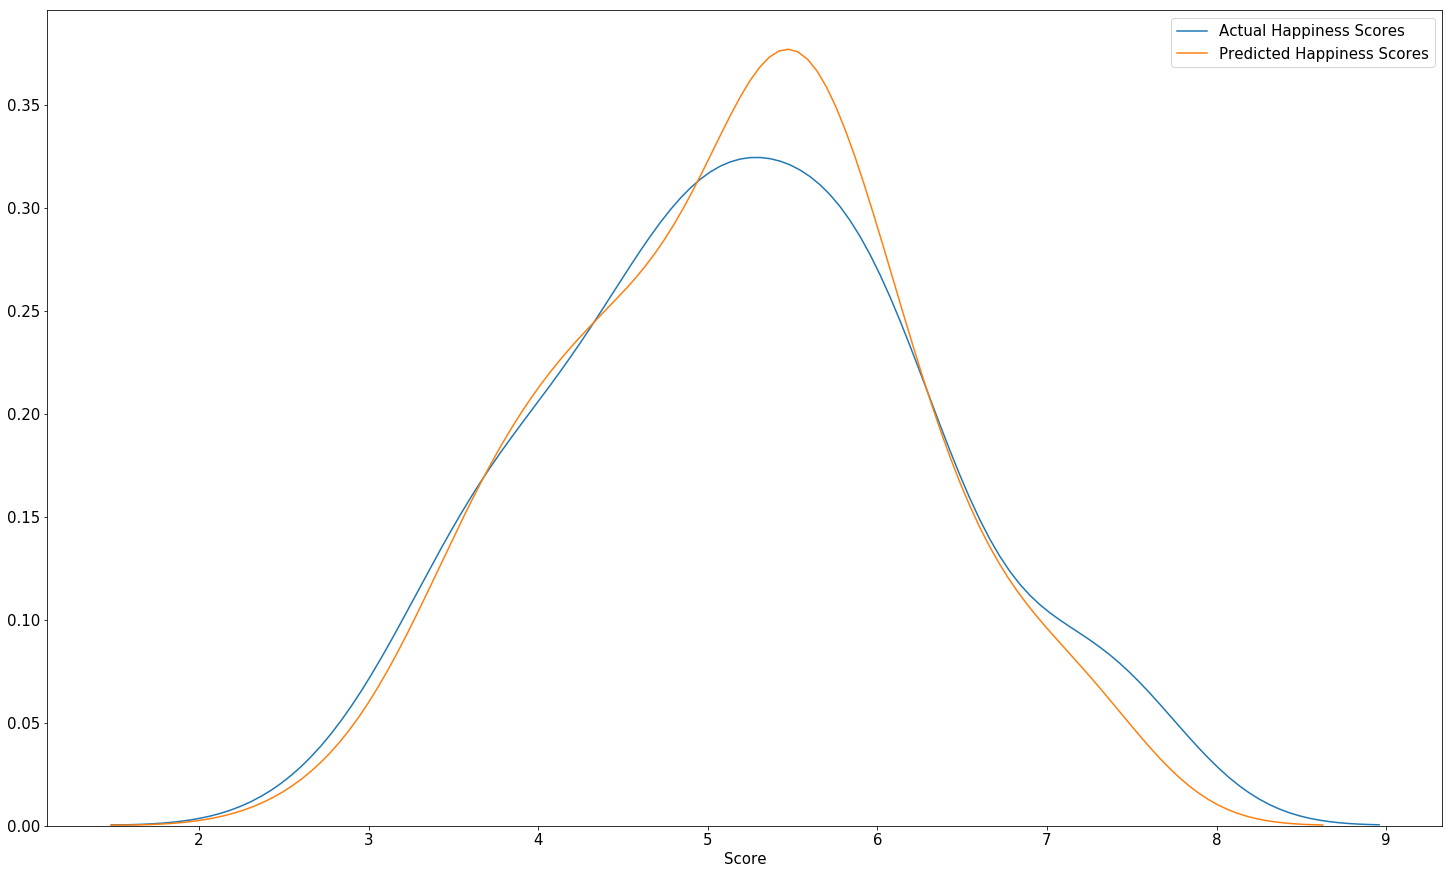

In [33]:
import seaborn

plt.rcParams["figure.figsize"] = (25, 15)

pred_scores = result.predict(X_test)

fig4, graph4 = plt.subplots()
seaborn.distplot(Y_test, hist=False, label="Actual Happiness Scores", ax=graph4)
seaborn.distplot(pred_scores, hist=False, label="Predicted Happiness Scores", ax=graph4)

Our model seems to be able to predict the happiness score of a country with moderate accuracy. But was every variable truly necessary? What if we repeated the same code, but instead only used the top 3 r-values from earlier? Or a model that only excluded generosity, given its weak p-value?

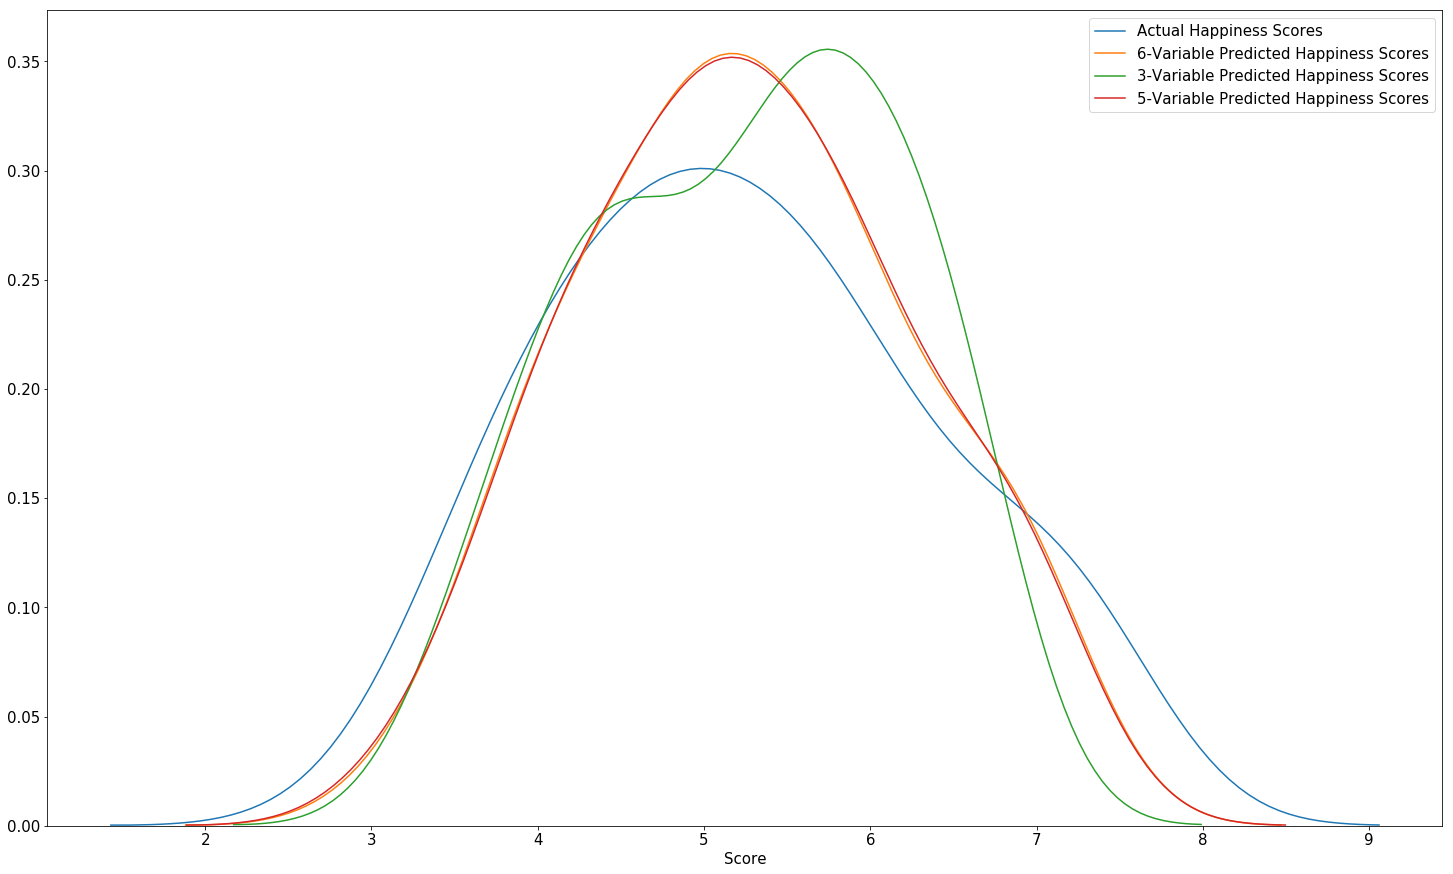

In [34]:
y = combined["Score"]
x = combined.drop("Score", axis=1)

plt.rcParams["figure.figsize"] = (25, 15)

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=.2)
X_train['Score'] = Y_train

result1 = statsmodels.formula.api.ols(formula="Score ~ Economy + Health + Family + Trust + Freedom + Generosity", data=X_train).fit()
result2 = statsmodels.formula.api.ols(formula="Score ~ Economy + Health + Family", data=X_train).fit()
result3 = statsmodels.formula.api.ols(formula="Score ~ Economy + Health + Family + Trust + Freedom", data=X_train).fit()

pred_scores1 = result1.predict(X_test)
pred_scores2 = result2.predict(X_test)
pred_scores3 = result3.predict(X_test)

fig5, graph5 = plt.subplots()
seaborn.distplot(Y_test, hist=False, label="Actual Happiness Scores", ax=graph5)
seaborn.distplot(pred_scores1, hist=False, label="6-Variable Predicted Happiness Scores", ax=graph5)
seaborn.distplot(pred_scores2, hist=False, label="3-Variable Predicted Happiness Scores", ax=graph5)
seaborn.distplot(pred_scores3, hist=False, label="5-Variable Predicted Happiness Scores", ax=graph5)

It seems our earlier 3 variables were not as good of an indicator as we had hoped. But there is good news, we do have a working model, and can even exclude a variable! In the above graph, the difference between the model with and without generosity is almost non-existant. 

# Conclusion pt.2

While money may make people happier, it is not the most important factor for overall happiness.  It seems that based on our model, the most important factor in determing happiness  freedom, followed somewhat closely by Health (Life Expectancy). Freedom being so important is somewhat unexpected based on our earlier analysis, but that is why we did further investigation! At this point, we have at least a vague idea that for a hypothetical country looking to make their citizens happier, they should look towards increasing the personal freedoms enjoyed by their citizens.

This information was all found at a very shallow level, and there are many more areas that could be further investigated. For anyone interested, I recommend looking into the datasets available at via the [UN regarding the E-Government Development Index](https://publicadministration.un.org/egovkb/en-us/About/Overview/-E-Government-Development-Index) or the [UN database](http://data.un.org/). Through these sources, you can further connect the data with specific areas. For instance, how does wage play into happiness? How about rights for minorities? Immigration? All of these areas have the potential to impact happiness of the citizens of a country, but until we investigate it, we won't know if it affects it, and if so by how much.

# Food for thought
Even still, we still have more things we can investigate and look into. Remember earlier when we added the region into the 2017 dataset? What if we analyzed the happiness score contingent on region?

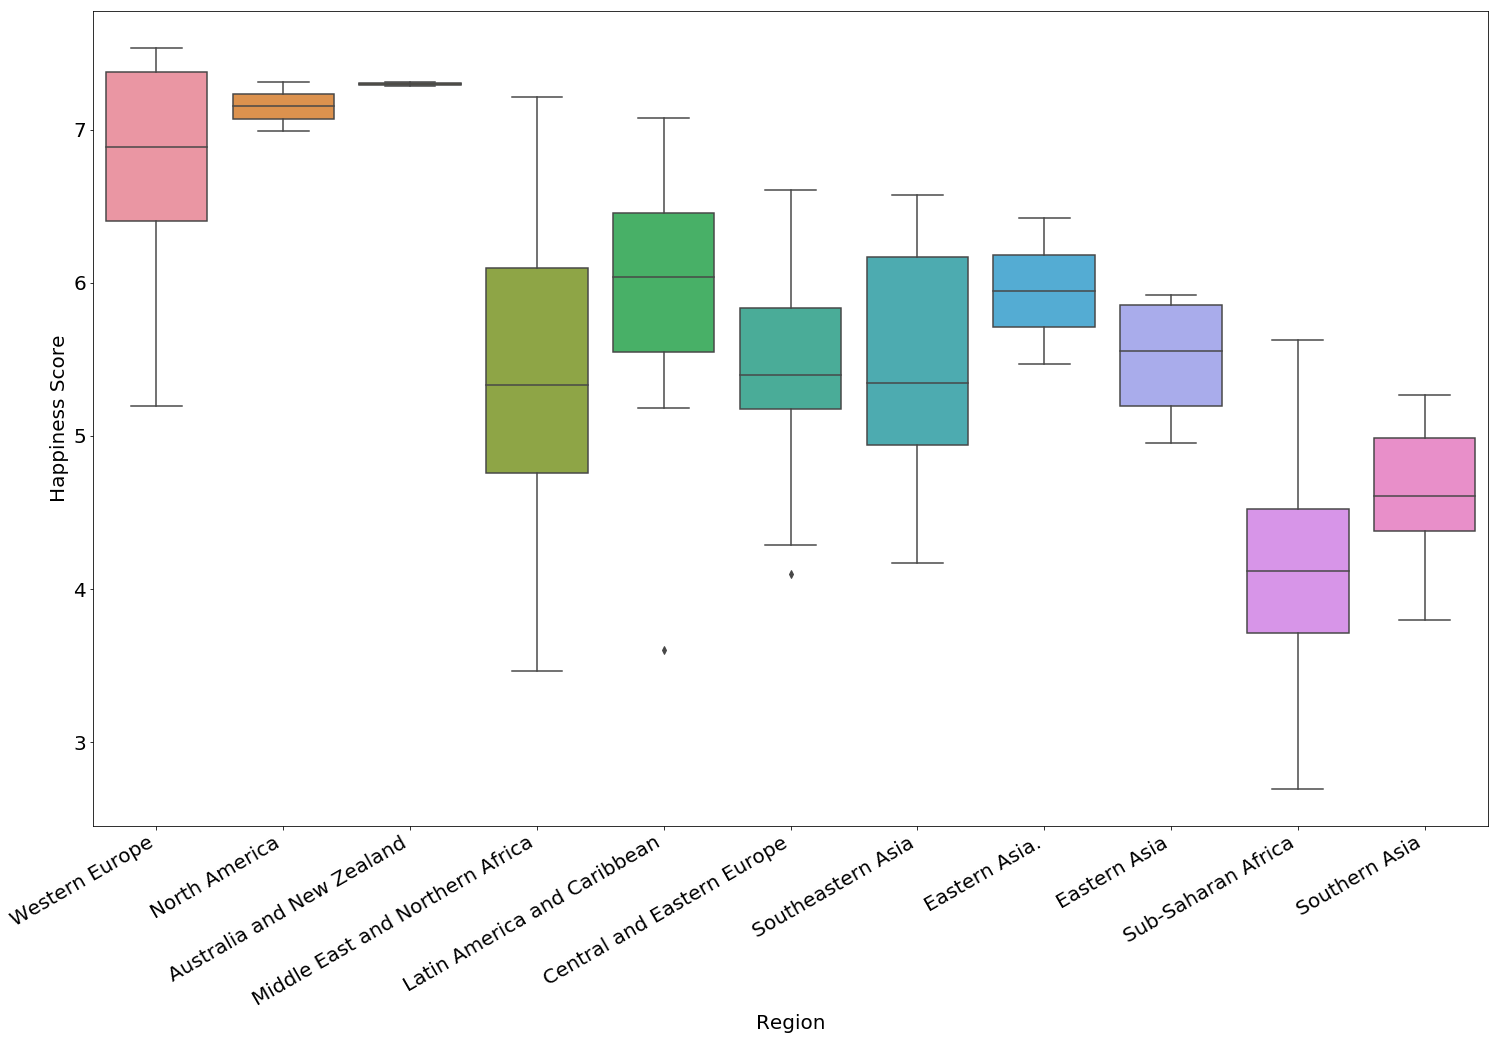

In [35]:
plt.rcParams["figure.figsize"] = (25, 15)
plt.rcParams.update({'font.size': 20})

fig5, graph5 = plt.subplots()
plt.setp(graph5.get_xticklabels(), rotation=30, horizontalalignment='right')

seaborn.boxplot(x='Region', y='Happiness Score', data=data17)

Region of the world seems to be a good predictor for the happiness score, at least at a high level. There are some outliers for each reason, for instance, Haiti has a happiness score of 3.603, way below the average of other "Latin America and Carribean" countries. The question here becomes, are certain regions simply happier, or are there other factors such as economic development at play? But, this is a question for another day.